# **Proyecto 2 IA**

# Pablo Hidalgo, Axel Chaves, Kevin Nuñez

---



Este proyecto tiene como objetivo principal aplicar **redes neuronales convolucionales (CNN)** en la aplicación de clasificación multiclase con imágenes utilizando **aprendizaje supervisado**. Adicionalmente permite explorar las herramientas de desarrollo de Machine Learning PyTorch, así como herramientas de monitoreo y bitácora.

Se deben realizar clasificadores de CNN utilizando el dataset [Covid-19 Image Dataset (kaggle.com) ](https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset), el cual contiene imágenes de rayos X y se encuentra clasificado en tres clases (Covid-19, Normal- Neumonia).

# **1. Descarga y descompresión del dataset**




Esta sección contiene el código necesario para descargar y descomprimir el dataset desde Kaggle. Se definen variables como la ruta de descarga y el tamaño de los chunks para descargar el archivo.

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'covid19-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F627146%2F1117472%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240511%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240511T183457Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D119701a739d6510782c5562ffa36a43ca452198b33b9469bac0ee120377193b7c6e327cdf9415a52fc90cea567cd6feeec47518e12a21e458e7138771fd3e77b5040881ff8486a02ad0cecb2ad503f6dc620be869b93660ed934635d024c6c3380dfa52937fea781dffd460e2da7d7cea6872f83488f0128399929a71a24b7f45c93b781b0a273286ff6e7ab8ac4afa53e3285e065428ba8656d6a4b7aece4e28354cfdf1fbd2bbe9644b1b453e14d8647e615f3b708fe88017ac29d599666d925aa9ca5494ce1a128a6d16c5f36dfeac14397b415f98ce7d95c945f338e4ee1179429b84248a7a461546b8765df61e41f3583dbc87b90331aeacdf90f87a7e9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 165557612 bytes downloaded
Downloaded and uncompressed: covid19-image-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0120.jpg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0118.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/098.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0119.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0100.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0106.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/096.png
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0113.jpg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/COVID-00012.jpg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0105.png
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0112.jpg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0

# **2. Importación de librerías**

Este bloque de código importa las librerías necesarias para el proyecto, incluyendo librerías para procesamiento de imágenes, redes neuronales y visualización.

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
import cv2
import torch
import torchvision
import matplotlib.pyplot as plt
import tensorflow as tf
import torch as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchvision.transforms import functional as TF
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import wandb
from wandb.integration.keras import WandbCallback

# **3. Configuración inicial**

Se configuran algunas variables importantes, como el dispositivo a utilizar (CPU o GPU), las dimensiones de las imágenes de entrada y el tamaño del lote.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
height, width = 224, 224
batch_size=32
num_epochs=30

# **5. Rutas de los datos**

Se definen las rutas de los directorios que contienen los datos de entrenamiento y prueba, separados en tres clases: Normal, Covid y Neumonía. También se imprime el número de imágenes en cada clase del conjunto de entrenamiento.

In [ ]:
train_dir = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_dir = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

train_normal_dir = os.path.join(train_dir, 'Normal')
train_covid_dir = os.path.join(train_dir, 'Covid')
train_pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')

test_normal_dir = os.path.join(test_dir, 'Normal')
test_covid_dir = os.path.join(test_dir, 'Covid')
test_pneumonia_dir = os.path.join(test_dir, 'Viral Pneumonia')

print(f"There are {len(os.listdir(train_normal_dir))} image of normal lungs")
print(f"There are {len(os.listdir(train_covid_dir))} image of lungs with covid-19")
print(f"There are {len(os.listdir(train_pneumonia_dir))} image of lungs with Pneumonia")

There are 70 image of normal lungs
There are 111 image of lungs with covid-19
There are 70 image of lungs with Pneumonia


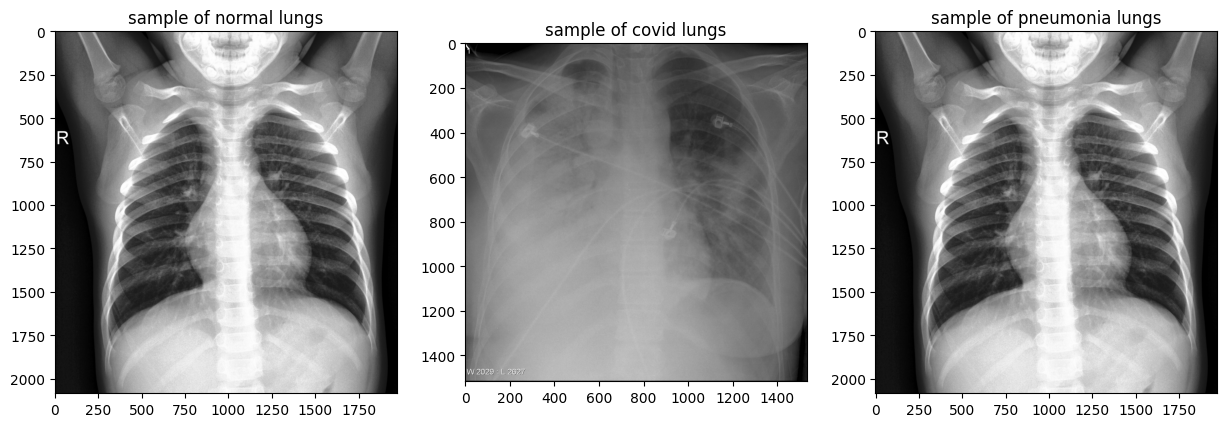

In [ ]:
from tensorflow.keras.utils import img_to_array, load_img
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
axes[0].imshow(load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[1])}"))
axes[0].set_title('sample of normal lungs')

axes[1].imshow(load_img(f"{os.path.join(train_covid_dir, os.listdir(train_covid_dir)[1])}"))
axes[1].set_title('sample of covid lungs')

axes[2].imshow(load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[1])}"))
axes[2].set_title('sample of pneumonia lungs')
plt.show()

In [ ]:
from tqdm import tqdm

In [ ]:
# Función para cargar imágenes y aplicar filtros
def load_and_filter_images(directory):
    filtered_images = []
    for image_name in tqdm(os.listdir(directory)):
        file_path = os.path.join(directory, image_name)
        image = cv2.imread(file_path)
        image = cv2.resize(image, (height, width))
        bilateral_filtered_image = cv2.bilateralFilter(image, 9, 75, 75)
        canny_edge_filtered_image = cv2.Canny(image, 100, 200)
        filtered_images.append((image, bilateral_filtered_image, canny_edge_filtered_image))
    return filtered_images

In [ ]:
# Cargar imágenes crudas y aplicar filtros
normal_train_images_raw = load_and_filter_images(train_normal_dir)
covid_train_images_raw = load_and_filter_images(train_covid_dir)
pneumonia_train_images_raw = load_and_filter_images(train_pneumonia_dir)

100%|██████████| 70/70 [00:05<00:00, 13.39it/s]


In [ ]:
# Dividir imágenes en crudo, filtradas con filtro bilateral y con filtro Canny
normal_train_images = [image[0] for image in normal_train_images_raw]
covid_train_images = [image[0] for image in covid_train_images_raw]
pneumonia_train_images = [image[0] for image in pneumonia_train_images_raw]

normal_train_images_bilateral = [image[1] for image in normal_train_images_raw]
covid_train_images_bilateral = [image[1] for image in covid_train_images_raw]
pneumonia_train_images_bilateral = [image[1] for image in pneumonia_train_images_raw]

normal_train_images_canny = [image[2] for image in normal_train_images_raw]
covid_train_images_canny = [image[2] for image in covid_train_images_raw]
pneumonia_train_images_canny = [image[2] for image in pneumonia_train_images_raw]

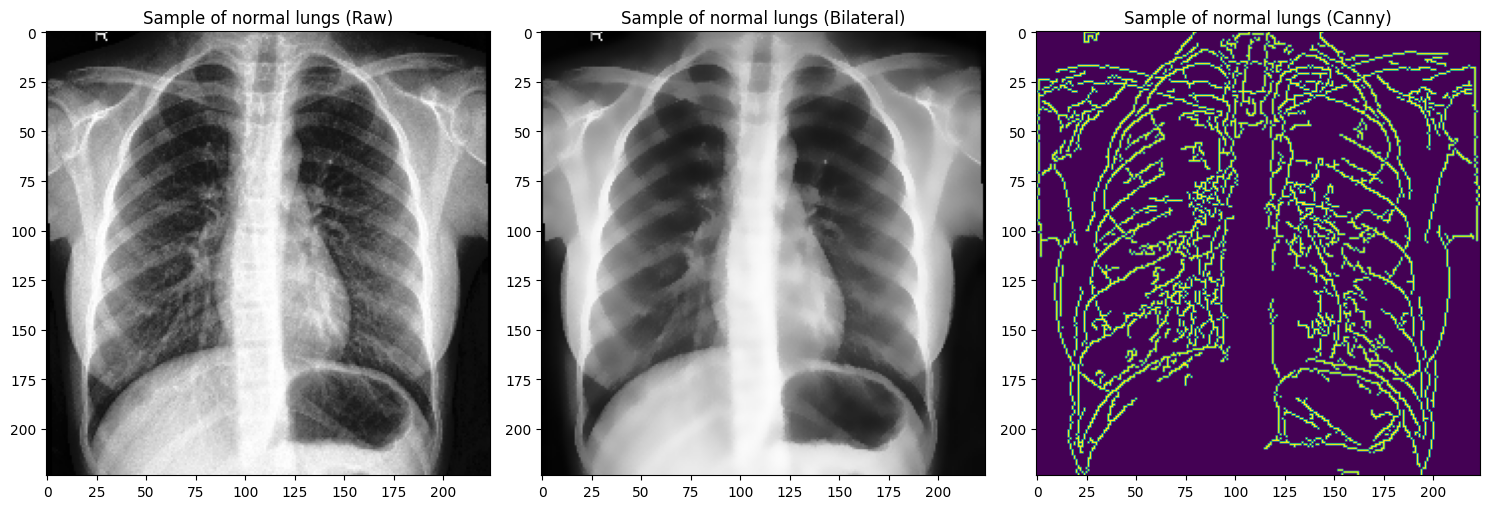

In [ ]:
# Visualización de muestras de imágenes para el conjunto de datos de pulmones normales
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes[0].imshow(normal_train_images[0])
axes[0].set_title('Sample of normal lungs (Raw)')
axes[1].imshow(normal_train_images_bilateral[0])
axes[1].set_title('Sample of normal lungs (Bilateral)')
axes[2].imshow(normal_train_images_canny[0])
axes[2].set_title('Sample of normal lungs (Canny)')

plt.tight_layout()
plt.show()

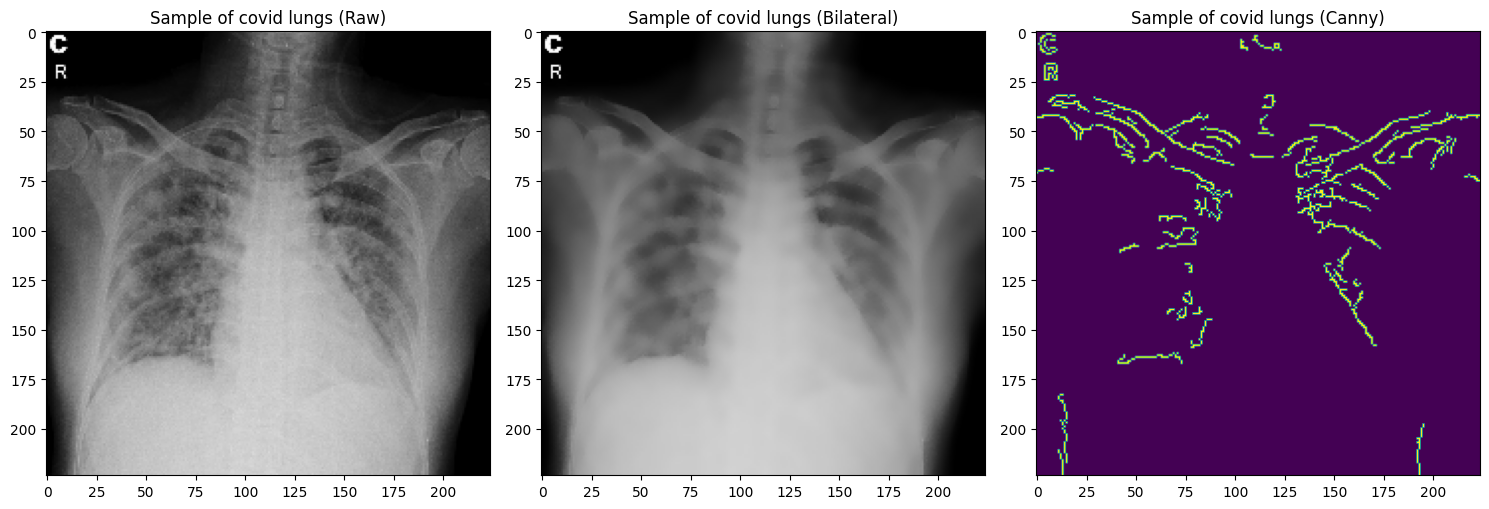

In [ ]:
# Visualización de muestras de imágenes para el conjunto de datos de pulmones con COVID
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes[0].imshow(covid_train_images[0])
axes[0].set_title('Sample of covid lungs (Raw)')
axes[1].imshow(covid_train_images_bilateral[0])
axes[1].set_title('Sample of covid lungs (Bilateral)')
axes[2].imshow(covid_train_images_canny[0])
axes[2].set_title('Sample of covid lungs (Canny)')

plt.tight_layout()
plt.show()

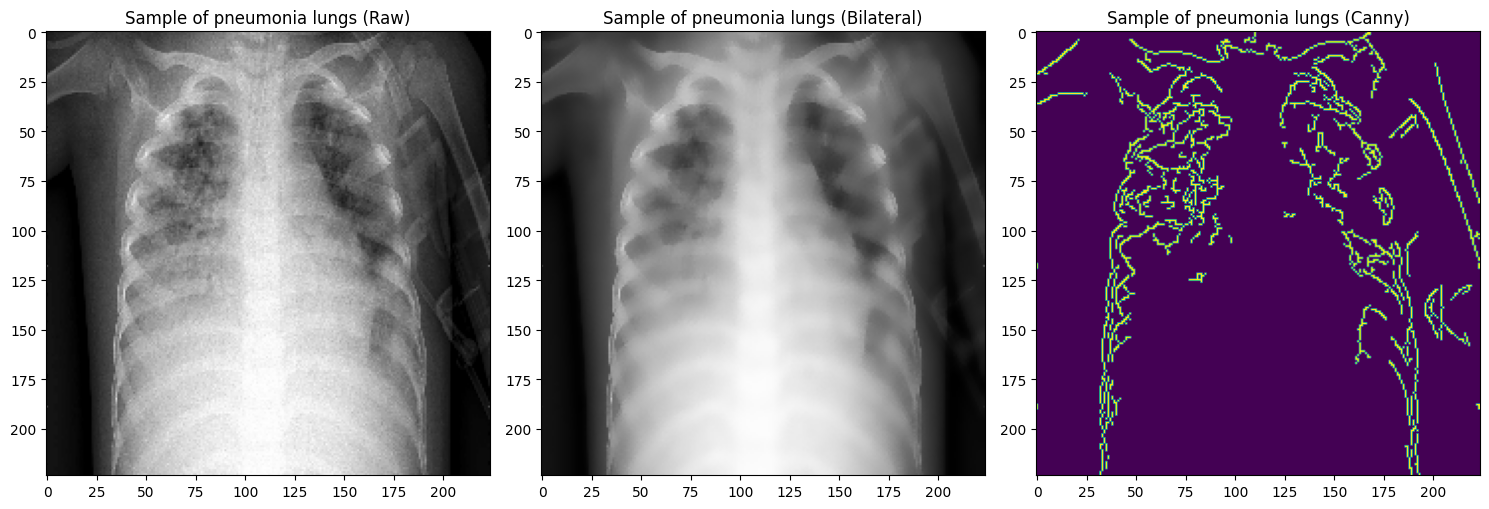

In [ ]:
# Visualización de muestras de imágenes para el conjunto de datos de pulmones con neumonía
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes[0].imshow(pneumonia_train_images[0])
axes[0].set_title('Sample of pneumonia lungs (Raw)')
axes[1].imshow(pneumonia_train_images_bilateral[0])
axes[1].set_title('Sample of pneumonia lungs (Bilateral)')
axes[2].imshow(pneumonia_train_images_canny[0])
axes[2].set_title('Sample of pneumonia lungs (Canny)')

plt.tight_layout()
plt.show()

In [ ]:
# Función para cargar imágenes y aplicar filtros de forma general
def load_and_filter_images(directory):
    filtered_images = []
    labels = []
    for root, dirs, files in tqdm(os.walk(directory)):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            try:
                image = cv2.imread(file_path)
                if image is None:
                    print(f"Error: No se pudo cargar la imagen: {file_path}")
                    continue
                image = cv2.resize(image, (height, width))
                bilateral_filtered_image = cv2.bilateralFilter(image, 9, 75, 75)
                canny_edge_filtered_image = cv2.Canny(image, 100, 200)
                filtered_images.append((image, bilateral_filtered_image, canny_edge_filtered_image))
                # Obtener la etiqueta de la carpeta padre
                label = os.path.basename(os.path.dirname(file_path))
                labels.append(label)
            except Exception as e:
                print(f"Error al procesar la imagen {file_path}: {str(e)}")
                continue
    return filtered_images, labels

# Asumiendo que tienes 3 clases
num_clases = 3

# Crea un diccionario que mapee los nombres de clase a índices numéricos
clase_a_indice = {'Normal': 0, 'Covid': 1, 'Viral Pneumonia': 2}

# Cargar y preprocesar todas las imágenes y obtener las etiquetas
train_images_raw, train_labels = load_and_filter_images(train_dir)

# Dividir imágenes en crudo, filtradas con filtro bilateral y con filtro Canny
train_images = [image[0] for image in train_images_raw]
train_images_bilateral = [image[1] for image in train_images_raw]
train_images_canny = [image[2] for image in train_images_raw]

# Convertir a array y agregar dimensión del canal para Canny
train_images = np.array(train_images)
train_images_bilateral = np.array(train_images_bilateral)
train_images_canny = np.array(train_images_canny)
train_images_canny = np.expand_dims(train_images_canny, axis=-1)

4it [00:13,  3.42s/it]


In [ ]:
# Convertir imágenes de Canny a tres canales
def convert_to_three_channels(canny_images):
    three_channel_images = []
    for image in canny_images:
        three_channel_image = np.repeat(image, 3, axis=-1)  # Repetir el canal único para obtener tres canales
        three_channel_images.append(three_channel_image)
    return three_channel_images

In [ ]:
from keras.utils import to_categorical

# Cargar y preprocesar las imagenes de prueba y obtener las etiquetas
test_images_raw, test_labels = load_and_filter_images(test_dir)

test_images = [image[0] for image in test_images_raw]
test_images_bilateral = [image[1] for image in test_images_raw]
test_images_canny = [image[2] for image in test_images_raw]

test_images = np.array(test_images)
test_images_bilateral = np.array(test_images_bilateral)
test_images_canny = np.array(test_images_canny)
test_images_canny = np.expand_dims(test_images_canny, axis=-1)
test_images_canny = convert_to_three_channels(test_images_canny)
test_images_canny = np.stack(test_images_canny, axis=0)

test_labels_one_hot = [to_categorical(clase_a_indice[label], num_clases) for label in test_labels]

4it [00:02,  1.95it/s]


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=40,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Codifica las etiquetas a one-hot
train_labels_one_hot = [to_categorical(clase_a_indice[label], num_clases) for label in train_labels]

# Generador de datos para imágenes crudas
train_generator_raw = datagen.flow(train_images, train_labels_one_hot, batch_size=32, shuffle=True)

# Generador de datos para imágenes con filtro bilateral
train_generator_bilateral = datagen.flow(train_images_bilateral, train_labels_one_hot, batch_size=32, shuffle=True)

# Convertir a 3 canales el filtro Canny Edge
train_images_canny = convert_to_three_channels(train_images_canny)

# Asegurarse de que las etiquetas tengan la misma longitud que las imágenes
train_labels_one_hot = train_labels_one_hot[:len(train_images_canny)]

# Convertir a formato numpy y ajustar las dimensiones
train_images_canny_array = np.array(train_images_canny)

# Generador de datos para imágenes con filtro Canny
train_generator_canny = datagen.flow(train_images_canny_array, train_labels_one_hot, batch_size=32, shuffle=True)

# También necesitas definir el generador de datos de validación si planeas usarlo
validation_generator = datagen.flow(train_images, train_labels_one_hot, batch_size=32, shuffle=False)

# **6. Modelo A: *ResNet50***



Se define el modelo A, que es una red neuronal convolucional ResNet18 pre-entrenada. Se reemplaza la última capa completamente conectada para ajustarla a nuestro problema de clasificación de tres clases.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Definir y compilar Modelo A (ResNet50)
base_model_A = ResNet50(weights='imagenet', include_top=False)
x = base_model_A.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions_A = Dense(3, activation='softmax')(x)
model_A = Model(inputs=base_model_A.input, outputs=predictions_A)

# Congelar pesos de las capas base de ResNet50
for layer in base_model_A.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Compilar modelo A
model_A.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
wandb.init(project="disease_classification", group="Modelo_A", name="Modelo_A_RawData",
           config={
               "learning_rate": 0.001,
               "batch_size": 32,
               "epochs": 30,
               "dataset": "raw"
           }
)
#06cdd0fdc84b1a71375cb25862ec49507463aaea

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Entrenar Modelo A con datos preprocesados (raw)
history_A = model_A.fit(train_generator_raw, epochs=num_epochs, validation_data=validation_generator, callbacks=[WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1.8636 - accuracy: 0.3904

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.8s


8/8 [==============================] - 121s 16s/step - loss: 1.8636 - accuracy: 0.3904 - val_loss: 1.1430 - val_accuracy: 0.4422
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 1.2458 - accuracy: 0.3546

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.5s


8/8 [==============================] - 117s 16s/step - loss: 1.2458 - accuracy: 0.3546 - val_loss: 1.0825 - val_accuracy: 0.4422
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 1.0237 - accuracy: 0.5060

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.9s


8/8 [==============================] - 154s 21s/step - loss: 1.0237 - accuracy: 0.5060 - val_loss: 1.0349 - val_accuracy: 0.2948
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 1.0067 - accuracy: 0.4462

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.7s


8/8 [==============================] - 152s 21s/step - loss: 1.0067 - accuracy: 0.4462 - val_loss: 0.9685 - val_accuracy: 0.4701
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.9316 - accuracy: 0.5697

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.6s


8/8 [==============================] - 152s 20s/step - loss: 0.9316 - accuracy: 0.5697 - val_loss: 0.8644 - val_accuracy: 0.5618
Epoch 6/30
8/8 [==============================] - 132s 18s/step - loss: 0.9051 - accuracy: 0.5657 - val_loss: 0.9285 - val_accuracy: 0.5737
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.8701 - accuracy: 0.5896

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.7s


8/8 [==============================] - 150s 21s/step - loss: 0.8701 - accuracy: 0.5896 - val_loss: 0.7763 - val_accuracy: 0.6494
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.8079 - accuracy: 0.6693

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.7s


8/8 [==============================] - 153s 21s/step - loss: 0.8079 - accuracy: 0.6693 - val_loss: 0.7721 - val_accuracy: 0.6414
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.7640 - accuracy: 0.6494

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.9s


8/8 [==============================] - 118s 16s/step - loss: 0.7640 - accuracy: 0.6494 - val_loss: 0.7463 - val_accuracy: 0.6813
Epoch 10/30
8/8 [==============================] - 94s 13s/step - loss: 0.7540 - accuracy: 0.6414 - val_loss: 0.8047 - val_accuracy: 0.6215
Epoch 11/30
8/8 [==============================] - 103s 14s/step - loss: 0.7837 - accuracy: 0.6454 - val_loss: 0.8161 - val_accuracy: 0.6255
Epoch 12/30
8/8 [==============================] - 94s 13s/step - loss: 0.8221 - accuracy: 0.6414 - val_loss: 0.7759 - val_accuracy: 0.6215
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.7792 - accuracy: 0.6454

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.5s


8/8 [==============================] - 118s 16s/step - loss: 0.7792 - accuracy: 0.6454 - val_loss: 0.7273 - val_accuracy: 0.6414
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.7207 - accuracy: 0.6295

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.4s


8/8 [==============================] - 149s 20s/step - loss: 0.7207 - accuracy: 0.6295 - val_loss: 0.6814 - val_accuracy: 0.7291
Epoch 15/30
8/8 [==============================] - 96s 13s/step - loss: 0.7116 - accuracy: 0.6853 - val_loss: 0.7122 - val_accuracy: 0.6295
Epoch 16/30
8/8 [==============================] - 137s 18s/step - loss: 0.6824 - accuracy: 0.6813 - val_loss: 0.7257 - val_accuracy: 0.6693
Epoch 17/30
8/8 [==============================] - 96s 13s/step - loss: 0.7512 - accuracy: 0.6056 - val_loss: 0.7001 - val_accuracy: 0.6733
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.6732 - accuracy: 0.6614

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.5s


8/8 [==============================] - 150s 21s/step - loss: 0.6732 - accuracy: 0.6614 - val_loss: 0.6640 - val_accuracy: 0.6813
Epoch 19/30
8/8 [==============================] - 129s 17s/step - loss: 0.6894 - accuracy: 0.7052 - val_loss: 0.7281 - val_accuracy: 0.6454
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.6838 - accuracy: 0.6614

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.9s


8/8 [==============================] - 149s 20s/step - loss: 0.6838 - accuracy: 0.6614 - val_loss: 0.6307 - val_accuracy: 0.7211
Epoch 21/30
8/8 [==============================] - 96s 13s/step - loss: 0.6817 - accuracy: 0.6574 - val_loss: 0.6413 - val_accuracy: 0.7291
Epoch 22/30
8/8 [==============================] - 128s 17s/step - loss: 0.6343 - accuracy: 0.6813 - val_loss: 0.6826 - val_accuracy: 0.7530
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.6492 - accuracy: 0.7331

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.7s


8/8 [==============================] - 115s 16s/step - loss: 0.6492 - accuracy: 0.7331 - val_loss: 0.6106 - val_accuracy: 0.7530
Epoch 24/30
8/8 [==============================] - 131s 18s/step - loss: 0.6246 - accuracy: 0.7331 - val_loss: 0.6174 - val_accuracy: 0.7131
Epoch 25/30
8/8 [==============================] - 102s 14s/step - loss: 0.6593 - accuracy: 0.6932 - val_loss: 0.6756 - val_accuracy: 0.6733
Epoch 26/30
8/8 [==============================] - 129s 18s/step - loss: 0.6467 - accuracy: 0.6932 - val_loss: 0.6355 - val_accuracy: 0.7410
Epoch 27/30
8/8 [==============================] - 93s 12s/step - loss: 0.6158 - accuracy: 0.7371 - val_loss: 0.6149 - val_accuracy: 0.7530
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 0.6036 - accuracy: 0.7251

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_200418-ckbhim4j/files/model-best)... Done. 0.9s


8/8 [==============================] - 150s 21s/step - loss: 0.6036 - accuracy: 0.7251 - val_loss: 0.5945 - val_accuracy: 0.7450
Epoch 29/30
8/8 [==============================] - 129s 17s/step - loss: 0.6062 - accuracy: 0.7371 - val_loss: 0.6802 - val_accuracy: 0.6693
Epoch 30/30
8/8 [==============================] - 129s 17s/step - loss: 0.6920 - accuracy: 0.6813 - val_loss: 0.6628 - val_accuracy: 0.6773


In [ ]:
wandb.finish()

accuracy,▂▁▄▃▅▅▅▇▆▆▆▆▆▆▇▇▆▇▇▇▇▇██▇▇███▇
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▅▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▃▃▁▄▅▅▆▆▇▆▆▆▆█▆▇▇▇▆████▇▇███▇▇
val_loss,█▇▇▆▄▅▃▃▃▄▄▃▃▂▃▃▂▂▃▁▂▂▁▁▂▂▁▁▂▂
accuracy,0.68127
best_epoch,27
best_val_loss,0.59448
epoch,29
loss,0.69197
val_accuracy,0.67729


In [ ]:
wandb.init(project="disease_classification", group="Modelo_A", name="Modelo_A_bilateral")
wandb.config = {
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 30,
    "dataset": "bilateral filter"
}
#06cdd0fdc84b1a71375cb25862ec49507463aaea

wandb: Currently logged in as: hidalgo-pablo56 (itcr_). Use `wandb login --relogin` to force relogin


In [ ]:
# Entrenar Modelo A con datos preprocesados (bilateral filter)
history_A_bilateral = model_A.fit(train_generator_bilateral, epochs=num_epochs, validation_data=validation_generator, callbacks=[WandbCallback()])

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6548 - accuracy: 0.7092

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_211342-p22m4r0j/files/model-best)... Done. 0.7s


8/8 [==============================] - 115s 16s/step - loss: 0.6548 - accuracy: 0.7092 - val_loss: 0.6842 - val_accuracy: 0.7809
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6592 - accuracy: 0.7131

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_211342-p22m4r0j/files/model-best)... Done. 0.6s


8/8 [==============================] - 151s 20s/step - loss: 0.6592 - accuracy: 0.7131 - val_loss: 0.6589 - val_accuracy: 0.7610
Epoch 3/30
8/8 [==============================] - 94s 13s/step - loss: 0.7971 - accuracy: 0.6574 - val_loss: 0.6734 - val_accuracy: 0.6494
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.7435 - accuracy: 0.6574

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_211342-p22m4r0j/files/model-best)... Done. 0.7s


8/8 [==============================] - 150s 20s/step - loss: 0.7435 - accuracy: 0.6574 - val_loss: 0.6307 - val_accuracy: 0.7012
Epoch 5/30
8/8 [==============================] - 131s 17s/step - loss: 0.7313 - accuracy: 0.6454 - val_loss: 0.8701 - val_accuracy: 0.6414
Epoch 6/30
8/8 [==============================] - 128s 17s/step - loss: 0.6603 - accuracy: 0.6932 - val_loss: 0.6588 - val_accuracy: 0.6813
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.6036 - accuracy: 0.7410

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_211342-p22m4r0j/files/model-best)... Done. 0.6s


8/8 [==============================] - 114s 15s/step - loss: 0.6036 - accuracy: 0.7410 - val_loss: 0.5750 - val_accuracy: 0.7331
Epoch 8/30
8/8 [==============================] - 104s 14s/step - loss: 0.6632 - accuracy: 0.6733 - val_loss: 0.7617 - val_accuracy: 0.6454
Epoch 9/30
8/8 [==============================] - 130s 17s/step - loss: 0.6760 - accuracy: 0.6614 - val_loss: 0.6105 - val_accuracy: 0.7450
Epoch 10/30
8/8 [==============================] - 128s 17s/step - loss: 0.6329 - accuracy: 0.7092 - val_loss: 0.6538 - val_accuracy: 0.7291
Epoch 11/30
8/8 [==============================] - 93s 12s/step - loss: 0.6424 - accuracy: 0.7131 - val_loss: 0.7007 - val_accuracy: 0.7450
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.7530

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_211342-p22m4r0j/files/model-best)... Done. 0.8s


8/8 [==============================] - 155s 21s/step - loss: 0.6208 - accuracy: 0.7530 - val_loss: 0.5445 - val_accuracy: 0.7888
Epoch 13/30
8/8 [==============================] - 93s 12s/step - loss: 0.5760 - accuracy: 0.7769 - val_loss: 0.5982 - val_accuracy: 0.7809
Epoch 14/30
8/8 [==============================] - 94s 12s/step - loss: 0.6181 - accuracy: 0.7211 - val_loss: 0.6074 - val_accuracy: 0.7410
Epoch 15/30
8/8 [==============================] - 129s 17s/step - loss: 0.6156 - accuracy: 0.7570 - val_loss: 0.5821 - val_accuracy: 0.7649
Epoch 16/30
8/8 [==============================] - 130s 17s/step - loss: 0.6197 - accuracy: 0.7131 - val_loss: 0.5904 - val_accuracy: 0.7450
Epoch 17/30
8/8 [==============================] - 94s 13s/step - loss: 0.6133 - accuracy: 0.7410 - val_loss: 0.5608 - val_accuracy: 0.8008
Epoch 18/30
8/8 [==============================] - 129s 17s/step - loss: 0.5835 - accuracy: 0.7809 - val_loss: 0.5559 - val_accuracy: 0.7809
Epoch 19/30
8/8 [===========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_211342-p22m4r0j/files/model-best)... Done. 0.5s


8/8 [==============================] - 115s 16s/step - loss: 0.6406 - accuracy: 0.7291 - val_loss: 0.5427 - val_accuracy: 0.7769
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.6063 - accuracy: 0.7570

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_211342-p22m4r0j/files/model-best)... Done. 1.2s


8/8 [==============================] - 151s 21s/step - loss: 0.6063 - accuracy: 0.7570 - val_loss: 0.5404 - val_accuracy: 0.7809
Epoch 23/30
8/8 [==============================] - 102s 13s/step - loss: 0.6331 - accuracy: 0.7410 - val_loss: 0.5421 - val_accuracy: 0.7729
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 0.5877 - accuracy: 0.7729

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_211342-p22m4r0j/files/model-best)... Done. 0.6s


8/8 [==============================] - 153s 21s/step - loss: 0.5877 - accuracy: 0.7729 - val_loss: 0.5363 - val_accuracy: 0.7928
Epoch 25/30
8/8 [==============================] - 128s 17s/step - loss: 0.5489 - accuracy: 0.7331 - val_loss: 0.6399 - val_accuracy: 0.6733
Epoch 26/30
8/8 [==============================] - 130s 18s/step - loss: 0.5974 - accuracy: 0.7530 - val_loss: 0.7272 - val_accuracy: 0.6653
Epoch 27/30
8/8 [==============================] - 129s 17s/step - loss: 0.6816 - accuracy: 0.6892 - val_loss: 0.9515 - val_accuracy: 0.6574
Epoch 28/30
8/8 [==============================] - 95s 13s/step - loss: 0.7891 - accuracy: 0.6853 - val_loss: 0.5980 - val_accuracy: 0.7291
Epoch 29/30
8/8 [==============================] - 93s 12s/step - loss: 0.6817 - accuracy: 0.6932 - val_loss: 0.9847 - val_accuracy: 0.5219
Epoch 30/30
8/8 [==============================] - 128s 17s/step - loss: 0.8203 - accuracy: 0.6335 - val_loss: 0.7490 - val_accuracy: 0.7131


In [ ]:
wandb.finish()

accuracy,▅▅▂▂▂▄▆▃▂▅▅▇█▅▇▅▆█▄▆▆▇▆█▆▇▄▃▄▁
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,▄▄▇▆▆▄▂▄▄▃▃▃▂▃▃▃▃▂▃▂▃▂▃▂▁▂▄▇▄█
val_accuracy,█▇▄▆▄▅▆▄▇▆▇██▇▇▇██▇▇▇█▇█▅▅▄▆▁▆
val_loss,▃▃▃▂▆▃▂▅▂▃▄▁▂▂▂▂▁▁▂▃▁▁▁▁▃▄▇▂█▄
accuracy,0.63347
best_epoch,23
best_val_loss,0.53628
epoch,29
loss,0.82035
val_accuracy,0.71315


In [ ]:
wandb.init(project="disease_classification", group="Modelo_A", name="Modelo_A_canny")
wandb.config = {
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 30,
    "dataset": "canny edge filter"
}
#06cdd0fdc84b1a71375cb25862ec49507463aaea

In [30]:
# Entrenar Modelo A con datos preprocesados (canny edge filter)
history_A_canny = model_A.fit(train_generator_canny, epochs=num_epochs, validation_data=validation_generator, callbacks=[WandbCallback()])

Epoch 1/30
8/8 [==============================] - 116s 15s/step - loss: 0.6131 - accuracy: 0.7490 - val_loss: 4.6507 - val_accuracy: 0.4422
Epoch 2/30
8/8 [==============================] - 94s 12s/step - loss: 0.5898 - accuracy: 0.7809 - val_loss: 4.7238 - val_accuracy: 0.4422
Epoch 3/30
8/8 [==============================] - 93s 12s/step - loss: 0.6080 - accuracy: 0.7570 - val_loss: 4.6507 - val_accuracy: 0.4422
Epoch 4/30
8/8 [==============================] - 129s 18s/step - loss: 0.5852 - accuracy: 0.7610 - val_loss: 4.9075 - val_accuracy: 0.4422
Epoch 5/30
8/8 [==============================] - 93s 12s/step - loss: 0.5491 - accuracy: 0.7689 - val_loss: 4.8143 - val_accuracy: 0.4422
Epoch 6/30
8/8 [==============================] - 127s 17s/step - loss: 0.5763 - accuracy: 0.7490 - val_loss: 5.0086 - val_accuracy: 0.4422
Epoch 7/30
8/8 [==============================] - 91s 12s/step - loss: 0.6256 - accuracy: 0.7092 - val_loss: 5.0451 - val_accuracy: 0.4422
Epoch 8/30
8/8 [========

In [32]:
wandb.finish()

# **7. Modelo B: *Propio***

Se define el modelo B, que es una red neuronal convolucional personalizada. Consta de tres capas convolucionales, una capa de max pooling y tres capas completamente conectadas. La última capa está configurada para tres clases.

In [33]:
import tensorflow as tf

# Función para crear el modelo B
def create_model():
    model = tf.keras.Sequential([
        # Capas convolucionales
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(height, width, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Aplanar
        tf.keras.layers.Flatten(),

        # Capas fully connected
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(3)
    ])
    return model

# Crear el modelo B
model_b = create_model()

# Compilar el modelo B
model_b.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [34]:
wandb.init(project="disease_classification", group="Modelo_B", name="Modelo_B_RawData")
wandb.config = {
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 30,
    "dataset": "raw"
}
#06cdd0fdc84b1a71375cb25862ec49507463aaea

In [35]:
# Entrenar el modelo B con datos preprocesados (raw)
history_B_raw = model_b.fit(train_generator_raw, epochs=num_epochs, validation_data=validation_generator, callbacks=[WandbCallback()])

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2.0766 - accuracy: 0.4343

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 7.4s


8/8 [==============================] - 88s 11s/step - loss: 2.0766 - accuracy: 0.4343 - val_loss: 1.0391 - val_accuracy: 0.4422
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 1.0288 - accuracy: 0.4741

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 10.8s


8/8 [==============================] - 86s 11s/step - loss: 1.0288 - accuracy: 0.4741 - val_loss: 0.8868 - val_accuracy: 0.6375
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.8617 - accuracy: 0.6016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.7s


8/8 [==============================] - 73s 9s/step - loss: 0.8617 - accuracy: 0.6016 - val_loss: 0.7366 - val_accuracy: 0.6574
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6620 - accuracy: 0.7052

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.7s


8/8 [==============================] - 72s 9s/step - loss: 0.6620 - accuracy: 0.7052 - val_loss: 0.6092 - val_accuracy: 0.7570
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.6468 - accuracy: 0.7092

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.7s


8/8 [==============================] - 68s 9s/step - loss: 0.6468 - accuracy: 0.7092 - val_loss: 0.4919 - val_accuracy: 0.8406
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.5210 - accuracy: 0.8167

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 13.2s


8/8 [==============================] - 79s 10s/step - loss: 0.5210 - accuracy: 0.8167 - val_loss: 0.4677 - val_accuracy: 0.7769
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.4792 - accuracy: 0.7649

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.6s


8/8 [==============================] - 74s 10s/step - loss: 0.4792 - accuracy: 0.7649 - val_loss: 0.4152 - val_accuracy: 0.8406
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.4483 - accuracy: 0.8207

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.8s


8/8 [==============================] - 74s 10s/step - loss: 0.4483 - accuracy: 0.8207 - val_loss: 0.3326 - val_accuracy: 0.8685
Epoch 9/30
8/8 [==============================] - 48s 6s/step - loss: 0.3747 - accuracy: 0.8486 - val_loss: 0.4443 - val_accuracy: 0.8247
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.3672 - accuracy: 0.8566

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.8s


8/8 [==============================] - 57s 7s/step - loss: 0.3672 - accuracy: 0.8566 - val_loss: 0.2789 - val_accuracy: 0.8884
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.3518 - accuracy: 0.8606

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.6s


8/8 [==============================] - 62s 8s/step - loss: 0.3518 - accuracy: 0.8606 - val_loss: 0.2787 - val_accuracy: 0.8566
Epoch 12/30
8/8 [==============================] - 52s 6s/step - loss: 0.3504 - accuracy: 0.8765 - val_loss: 0.2924 - val_accuracy: 0.8964
Epoch 13/30
8/8 [==============================] - 59s 8s/step - loss: 0.2715 - accuracy: 0.9124 - val_loss: 0.3163 - val_accuracy: 0.8845
Epoch 14/30
8/8 [==============================] - 48s 6s/step - loss: 0.3392 - accuracy: 0.8765 - val_loss: 0.2799 - val_accuracy: 0.8964
Epoch 15/30
8/8 [==============================] - 48s 6s/step - loss: 0.3834 - accuracy: 0.8685 - val_loss: 0.5291 - val_accuracy: 0.7689
Epoch 16/30
8/8 [==============================] - 66s 9s/step - loss: 0.3656 - accuracy: 0.8765 - val_loss: 0.2983 - val_accuracy: 0.9044
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.2718 - accuracy: 0.9044

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.7s


8/8 [==============================] - 84s 11s/step - loss: 0.2718 - accuracy: 0.9044 - val_loss: 0.2118 - val_accuracy: 0.9243
Epoch 18/30
8/8 [==============================] - 54s 6s/step - loss: 0.3355 - accuracy: 0.8805 - val_loss: 0.2539 - val_accuracy: 0.8884
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 0.2907 - accuracy: 0.8924

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.5s


8/8 [==============================] - 77s 10s/step - loss: 0.2907 - accuracy: 0.8924 - val_loss: 0.2035 - val_accuracy: 0.9283
Epoch 20/30
8/8 [==============================] - 59s 7s/step - loss: 0.2053 - accuracy: 0.9442 - val_loss: 0.2169 - val_accuracy: 0.9084
Epoch 21/30
8/8 [==============================] - 49s 6s/step - loss: 0.2755 - accuracy: 0.9044 - val_loss: 0.2915 - val_accuracy: 0.8765
Epoch 22/30
8/8 [==============================] - 56s 7s/step - loss: 0.3245 - accuracy: 0.8765 - val_loss: 0.2495 - val_accuracy: 0.9084
Epoch 23/30
8/8 [==============================] - 48s 6s/step - loss: 0.2619 - accuracy: 0.9084 - val_loss: 0.2422 - val_accuracy: 0.9084
Epoch 24/30
8/8 [==============================] - 51s 6s/step - loss: 0.2526 - accuracy: 0.9004 - val_loss: 0.2279 - val_accuracy: 0.9243
Epoch 25/30
8/8 [==============================] - 48s 6s/step - loss: 0.2943 - accuracy: 0.8845 - val_loss: 0.2458 - val_accuracy: 0.9084
Epoch 26/30
8/8 [=====================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240512_234728-12yfiw72/files/model-best)... Done. 3.6s


8/8 [==============================] - 70s 9s/step - loss: 0.1976 - accuracy: 0.9243 - val_loss: 0.1711 - val_accuracy: 0.9283
Epoch 29/30
8/8 [==============================] - 63s 7s/step - loss: 0.2179 - accuracy: 0.9243 - val_loss: 0.2533 - val_accuracy: 0.9044
Epoch 30/30
8/8 [==============================] - 47s 6s/step - loss: 0.2939 - accuracy: 0.9084 - val_loss: 0.2026 - val_accuracy: 0.9283


In [36]:
wandb.finish()

accuracy,▁▂▃▅▅▆▆▆▇▇▇▇█▇▇▇▇▇▇█▇▇█▇▇▇████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▄▃▃▃▂▂▂▂▂▂▂▁▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▄▆▇▆▇▇▇▇▇█▇█▆██▇██▇█████████
val_loss,█▇▆▅▄▃▃▂▃▂▂▂▂▂▄▂▁▂▁▁▂▂▂▁▂▂▁▁▂▁
accuracy,0.90837
best_epoch,27
best_val_loss,0.17106
epoch,29
loss,0.29391
val_accuracy,0.92829


In [37]:
wandb.init(project="disease_classification", group="Modelo_B", name="Modelo_B_bilateral")
wandb.config = {
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 30,
    "dataset": "bilateral filter"
}
#06cdd0fdc84b1a71375cb25862ec49507463aaea

In [38]:
# Entrenar el modelo B con datos preprocesados (bilateral filter)
history_B_bilateral = model_b.fit(train_generator_bilateral, epochs=num_epochs, validation_data=validation_generator, callbacks=[WandbCallback()])

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.2575 - accuracy: 0.8964

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240513_002352-vl6rcpfc/files/model-best)... Done. 3.7s


8/8 [==============================] - 64s 8s/step - loss: 0.2575 - accuracy: 0.8964 - val_loss: 0.2250 - val_accuracy: 0.9243
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.2279 - accuracy: 0.9084

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240513_002352-vl6rcpfc/files/model-best)... Done. 3.7s


8/8 [==============================] - 73s 9s/step - loss: 0.2279 - accuracy: 0.9084 - val_loss: 0.1409 - val_accuracy: 0.9442
Epoch 3/30
8/8 [==============================] - 60s 7s/step - loss: 0.1810 - accuracy: 0.9283 - val_loss: 0.1901 - val_accuracy: 0.9163
Epoch 4/30
8/8 [==============================] - 49s 6s/step - loss: 0.1914 - accuracy: 0.9163 - val_loss: 0.1990 - val_accuracy: 0.9323
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.1772 - accuracy: 0.9323

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240513_002352-vl6rcpfc/files/model-best)... Done. 5.8s


8/8 [==============================] - 83s 11s/step - loss: 0.1772 - accuracy: 0.9323 - val_loss: 0.1205 - val_accuracy: 0.9641
Epoch 6/30
8/8 [==============================] - 60s 8s/step - loss: 0.1600 - accuracy: 0.9323 - val_loss: 0.1324 - val_accuracy: 0.9562
Epoch 7/30
8/8 [==============================] - 59s 7s/step - loss: 0.1501 - accuracy: 0.9522 - val_loss: 0.1401 - val_accuracy: 0.9482
Epoch 8/30
8/8 [==============================] - 57s 7s/step - loss: 0.1841 - accuracy: 0.9243 - val_loss: 0.1855 - val_accuracy: 0.9363
Epoch 9/30
8/8 [==============================] - 56s 7s/step - loss: 0.2048 - accuracy: 0.9283 - val_loss: 0.1370 - val_accuracy: 0.9482
Epoch 10/30
8/8 [==============================] - 58s 8s/step - loss: 0.1942 - accuracy: 0.9283 - val_loss: 0.1901 - val_accuracy: 0.9363
Epoch 11/30
8/8 [==============================] - 57s 7s/step - loss: 0.1663 - accuracy: 0.9442 - val_loss: 0.2124 - val_accuracy: 0.9124
Epoch 12/30
8/8 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240513_002352-vl6rcpfc/files/model-best)... Done. 5.4s


8/8 [==============================] - 61s 8s/step - loss: 0.2225 - accuracy: 0.9124 - val_loss: 0.1085 - val_accuracy: 0.9602
Epoch 13/30
8/8 [==============================] - 52s 6s/step - loss: 0.1893 - accuracy: 0.9363 - val_loss: 0.1091 - val_accuracy: 0.9681
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.1543 - accuracy: 0.9482

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240513_002352-vl6rcpfc/files/model-best)... Done. 16.4s


8/8 [==============================] - 85s 11s/step - loss: 0.1543 - accuracy: 0.9482 - val_loss: 0.1083 - val_accuracy: 0.9602
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.1477 - accuracy: 0.9442

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240513_002352-vl6rcpfc/files/model-best)... Done. 3.6s


8/8 [==============================] - 69s 9s/step - loss: 0.1477 - accuracy: 0.9442 - val_loss: 0.0935 - val_accuracy: 0.9721
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.1884 - accuracy: 0.9163

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240513_002352-vl6rcpfc/files/model-best)... Done. 8.1s


8/8 [==============================] - 71s 9s/step - loss: 0.1884 - accuracy: 0.9163 - val_loss: 0.0865 - val_accuracy: 0.9721
Epoch 17/30
8/8 [==============================] - 47s 6s/step - loss: 0.1645 - accuracy: 0.9402 - val_loss: 0.1651 - val_accuracy: 0.9442
Epoch 18/30
8/8 [==============================] - 48s 6s/step - loss: 0.1887 - accuracy: 0.9402 - val_loss: 0.1213 - val_accuracy: 0.9602
Epoch 19/30
8/8 [==============================] - 58s 7s/step - loss: 0.1516 - accuracy: 0.9402 - val_loss: 0.1092 - val_accuracy: 0.9641
Epoch 20/30
8/8 [==============================] - 57s 7s/step - loss: 0.1723 - accuracy: 0.9442 - val_loss: 0.1389 - val_accuracy: 0.9562
Epoch 21/30
8/8 [==============================] - 49s 6s/step - loss: 0.1204 - accuracy: 0.9602 - val_loss: 0.1324 - val_accuracy: 0.9522
Epoch 22/30
8/8 [==============================] - 57s 7s/step - loss: 0.1210 - accuracy: 0.9482 - val_loss: 0.1030 - val_accuracy: 0.9602
Epoch 23/30
8/8 [======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240513_002352-vl6rcpfc/files/model-best)... Done. 3.7s


8/8 [==============================] - 72s 9s/step - loss: 0.0938 - accuracy: 0.9681 - val_loss: 0.0566 - val_accuracy: 0.9761
Epoch 29/30
8/8 [==============================] - 59s 8s/step - loss: 0.1307 - accuracy: 0.9363 - val_loss: 0.0833 - val_accuracy: 0.9602
Epoch 30/30
8/8 [==============================] - 57s 7s/step - loss: 0.0797 - accuracy: 0.9681 - val_loss: 0.1045 - val_accuracy: 0.9602


In [39]:
wandb.finish()

accuracy,▁▂▄▃▅▅▆▄▄▄▆▃▅▆▆▃▅▅▅▆▇▆▆▂▆▆▆█▅█
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▇▅▅▅▄▄▅▆▆▄▇▅▄▄▅▄▅▄▅▃▃▃▇▃▄▃▂▃▁
val_accuracy,▂▅▁▃▇▆▅▄▅▄▁▆▇▆██▅▆▇▆▅▆▁▅▅▆▆█▆▆
val_loss,█▅▇▇▄▄▄▆▄▇▇▃▃▃▃▂▆▄▃▄▄▃█▄▄▄▃▁▂▃
accuracy,0.96813
best_epoch,27
best_val_loss,0.05661
epoch,29
loss,0.07966
val_accuracy,0.96016


In [40]:
wandb.init(project="disease_classification", group="Modelo_B", name="Modelo_B_canny")
wandb.config = {
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 30,
    "dataset": "canny edge filter"
}
#06cdd0fdc84b1a71375cb25862ec49507463aaea

In [41]:
# Entrenar el modelo B con datos preprocesados (canny edge filter)
history_B_canny = model_b.fit(train_generator_canny, epochs=num_epochs, validation_data=validation_generator, callbacks=[WandbCallback()])

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 3.6193 - accuracy: 0.5777

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240513_005802-9ybuaj76/files/model-best)... Done. 3.6s


8/8 [==============================] - 73s 10s/step - loss: 3.6193 - accuracy: 0.5777 - val_loss: 0.6454 - val_accuracy: 0.8008
Epoch 2/30
8/8 [==============================] - 62s 7s/step - loss: 0.7161 - accuracy: 0.6853 - val_loss: 0.8062 - val_accuracy: 0.6614
Epoch 3/30
8/8 [==============================] - 58s 7s/step - loss: 0.6679 - accuracy: 0.7092 - val_loss: 0.8068 - val_accuracy: 0.7570
Epoch 4/30
8/8 [==============================] - 61s 8s/step - loss: 0.6084 - accuracy: 0.7450 - val_loss: 1.0397 - val_accuracy: 0.4462
Epoch 5/30
8/8 [==============================] - 48s 6s/step - loss: 0.6459 - accuracy: 0.7450 - val_loss: 0.8474 - val_accuracy: 0.6813
Epoch 6/30
8/8 [==============================] - 49s 6s/step - loss: 0.6402 - accuracy: 0.7092 - val_loss: 0.8723 - val_accuracy: 0.7052
Epoch 7/30
8/8 [==============================] - 57s 8s/step - loss: 0.5879 - accuracy: 0.7649 - val_loss: 0.8803 - val_accuracy: 0.5936
Epoch 8/30
8/8 [============================

In [42]:
wandb.finish()

accuracy,▁▃▄▅▅▄▅▆▆▆▇▆▆▇▇▆▇▆█▇█▇▇▇██████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,█▅▇▁▆▆▄▁▇▆▃▅▇▃▅▆▇▄▄▃▄▂▄▂▃▆▅▄▄▃
val_loss,▁▄▄▇▄▅▅█▃▃▅▄▃▅▄▄▃▅▅▆▅█▅█▆▃▅▆▅▆
accuracy,0.9004
best_epoch,0
best_val_loss,0.6454
epoch,29
loss,0.25528
val_accuracy,0.55777


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_models(model, history, X_test, y_test):
    """
    Evalúa un modelo en términos de precisión, recuperación y puntaje F1.

    Args:
        model: Modelo a evaluar.
        history: Historial de entrenamiento del modelo.
        X_test (np.array): Conjunto de datos de prueba.
        y_test (np.array): Etiquetas de prueba.
    """

    # Obtener predicciones del modelo
    y_pred = model.predict(X_test)

    # Obtener la última época del historial
    train_loss = history.history['loss'][-1]
    train_acc = history.history['accuracy'][-1]

    # Calcular métricas de evaluación
    test_acc = accuracy_score(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1))
    test_precision = precision_score(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1), average='macro')
    test_recall = recall_score(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1), average='macro', zero_division=0)
    test_f1 = f1_score(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1), average='macro')

    # Imprimir resultados
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")

In [44]:
# Evaluar modelo A con datos preprocesados (raw)
print("Evaluating Model A with raw data:")
evaluate_models(model_A, history_A, test_images, test_labels_one_hot)

Evaluating Model A with raw data:
3/3 [==============================] - 14s 4s/step
Train Loss: 0.6920
Train Accuracy: 0.6813
Test Accuracy: 0.3939
Test Precision: 0.3333
Test Recall: 0.1313
Test F1 Score: 0.1884


In [45]:
# Evaluar modelo A con datos preprocesados (bilateral filter)
print("Evaluating Model A with bilateral filter data:")
evaluate_models(model_A, history_A_bilateral, test_images_bilateral, test_labels_one_hot)

Evaluating Model A with bilateral filter data:
3/3 [==============================] - 12s 3s/step
Train Loss: 0.8203
Train Accuracy: 0.6335
Test Accuracy: 0.3939
Test Precision: 0.3333
Test Recall: 0.1313
Test F1 Score: 0.1884


In [46]:
# Evaluar modelo A con datos preprocesados (canny edge filter)
print("Evaluating Model A with canny edge data:")
evaluate_models(model_A, history_A_canny, test_images_canny, test_labels_one_hot)

Evaluating Model A with canny edge data:
3/3 [==============================] - 12s 4s/step
Train Loss: 0.4437
Train Accuracy: 0.8127
Test Accuracy: 0.3333
Test Precision: 0.2821
Test Recall: 0.1183
Test F1 Score: 0.1667


In [47]:
# Evaluar modelo B con datos preprocesados (raw)
print("Evaluating Model B with raw data:")
evaluate_models(model_b, history_B_raw, test_images, test_labels_one_hot)

Evaluating Model B with raw data:
3/3 [==============================] - 3s 792ms/step
Train Loss: 0.2939
Train Accuracy: 0.9084
Test Accuracy: 0.4545
Test Precision: 0.4923
Test Recall: 0.5341
Test F1 Score: 0.4113


In [48]:
# Evaluar modelo B con datos preprocesados (bilateral filter)
print("Evaluating Model B with bilateral filter data:")
evaluate_models(model_b, history_B_bilateral, test_images_bilateral, test_labels_one_hot)

Evaluating Model B with bilateral filter data:
3/3 [==============================] - 2s 522ms/step
Train Loss: 0.0797
Train Accuracy: 0.9681
Test Accuracy: 0.4091
Test Precision: 0.4423
Test Recall: 0.4938
Test F1 Score: 0.3732


In [49]:
# Evaluar modelo B con datos preprocesados (canny edge filter)
print("Evaluating Model B with canny edge data:")
evaluate_models(model_b, history_B_canny, test_images_canny, test_labels_one_hot)

Evaluating Model B with canny edge data:
3/3 [==============================] - 2s 528ms/step
Train Loss: 0.2553
Train Accuracy: 0.9004
Test Accuracy: 0.7424
Test Precision: 0.7551
Test Recall: 0.7756
Test F1 Score: 0.7441


In [50]:
def compute_saliency_map(model, image):
    # Convertir la imagen a tensor y añadir una dimensión adicional para el lote
    image_tensor = tf.convert_to_tensor(image[np.newaxis, ...], dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        # Obtener las predicciones del modelo
        predictions = model(image_tensor)
        # Obtener la clase predicha como un escalar
        predicted_class = tf.argmax(predictions[0])
        # Obtener la puntuación de la clase predicha
        predicted_score = predictions[0][predicted_class]

    # Calcular gradientes de la puntuación de la clase predicha con respecto a la entrada (imagen)
    gradients = tape.gradient(predicted_score, image_tensor)
    # Calcular el mapa de saliencia como el valor absoluto del gradiente
    saliency_map = tf.abs(gradients)
    # Obtener el máximo valor en el mapa de saliencia para normalización
    max_value = tf.reduce_max(saliency_map)
    # Normalizar el mapa de saliencia dividiendo por el máximo valor
    saliency_map /= max_value

    # Obtener el mapa de saliencia como un array numpy
    saliency_map = saliency_map.numpy()
    return saliency_map[0]

In [51]:
def visualize_saliency_map(image, saliency_map):
    # Escalar el mapa de saliencia para visualización
    saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))
    # Aplicar el mapa de saliencia a la imagen original
    saliency_map = np.uint8(255 * saliency_map)
    # Convertir la imagen a formato de color
    image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Aplicar el mapa de saliencia a la imagen original
    heatmap = cv2.applyColorMap(saliency_map, cv2.COLORMAP_JET)
    # Mezclar la imagen original y el mapa de saliencia
    overlaid_image = cv2.addWeighted(image_color, 0.7, heatmap, 0.3, 0)
    return overlaid_image

In [52]:
def generate_and_visualize_saliency_map(model, image):
    # Calcular el mapa de saliencia
    saliency_map = compute_saliency_map(model, image)
    # Visualizar el mapa de saliencia sobre la imagen original
    overlaid_image = visualize_saliency_map(image, saliency_map)
    # Mostrar la imagen resultante
    plt.imshow(overlaid_image)
    plt.axis('off')
    plt.show()

Generating and visualizing Saliency Map for Model A with raw data:


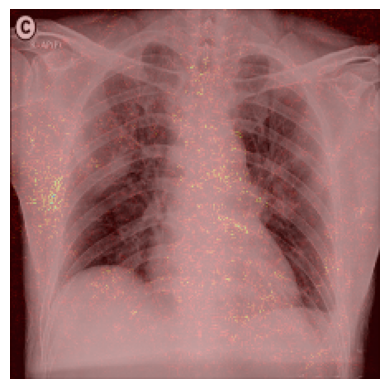

In [53]:
# Generar y visualizar Saliency Map para el Modelo A con datos preprocesados (raw)
print("Generating and visualizing Saliency Map for Model A with raw data:")
generate_and_visualize_saliency_map(model_A, test_images[0])

Generating and visualizing Saliency Map for Model A with bilateral filter data:


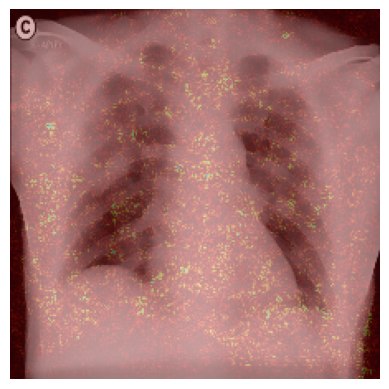

In [54]:
# Generar y visualizar Saliency Map para el Modelo A con datos preprocesados (bilateral filter)
print("Generating and visualizing Saliency Map for Model A with bilateral filter data:")
generate_and_visualize_saliency_map(model_A, test_images_bilateral[0])

Generating and visualizing Saliency Map for Model A with canny edge data:


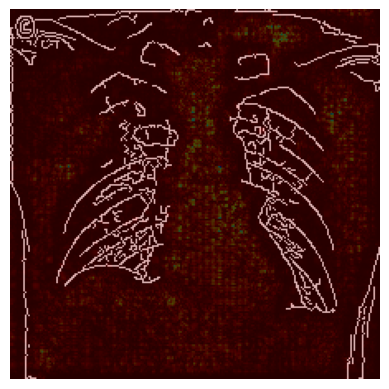

In [55]:
# Generar y visualizar Saliency Map para el Modelo A con datos preprocesados (canny edge filter)
print("Generating and visualizing Saliency Map for Model A with canny edge data:")
generate_and_visualize_saliency_map(model_A, test_images_canny[0])

Generating and visualizing Saliency Map for Model B with raw data:


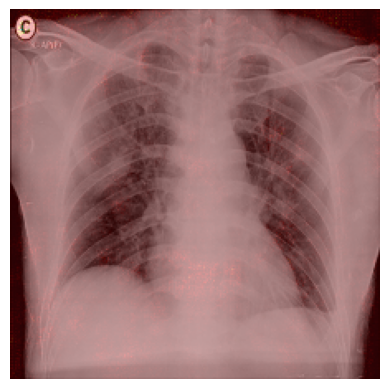

In [56]:
# Generar y visualizar Saliency Map para el Modelo B con datos preprocesados (raw)
print("Generating and visualizing Saliency Map for Model B with raw data:")
generate_and_visualize_saliency_map(model_b, test_images[0])

Generating and visualizing Saliency Map for Model B with bilateral filter data:


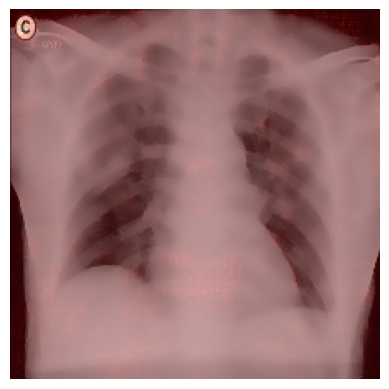

In [57]:
# Generar y visualizar Saliency Map para el Modelo B con datos preprocesados (bilateral filter)
print("Generating and visualizing Saliency Map for Model B with bilateral filter data:")
generate_and_visualize_saliency_map(model_b, test_images_bilateral[0])

Generating and visualizing Saliency Map for Model B with canny edge data:


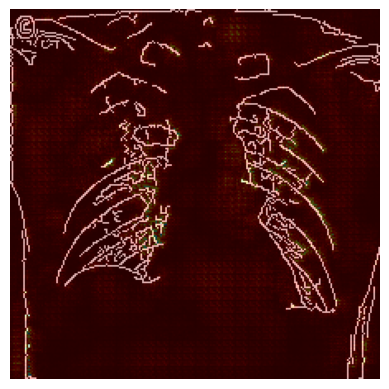

In [58]:
# Generar y visualizar Saliency Map para el Modelo B con datos preprocesados (canny edge filter)
print("Generating and visualizing Saliency Map for Model B with canny edge data:")
generate_and_visualize_saliency_map(model_b, test_images_canny[0])